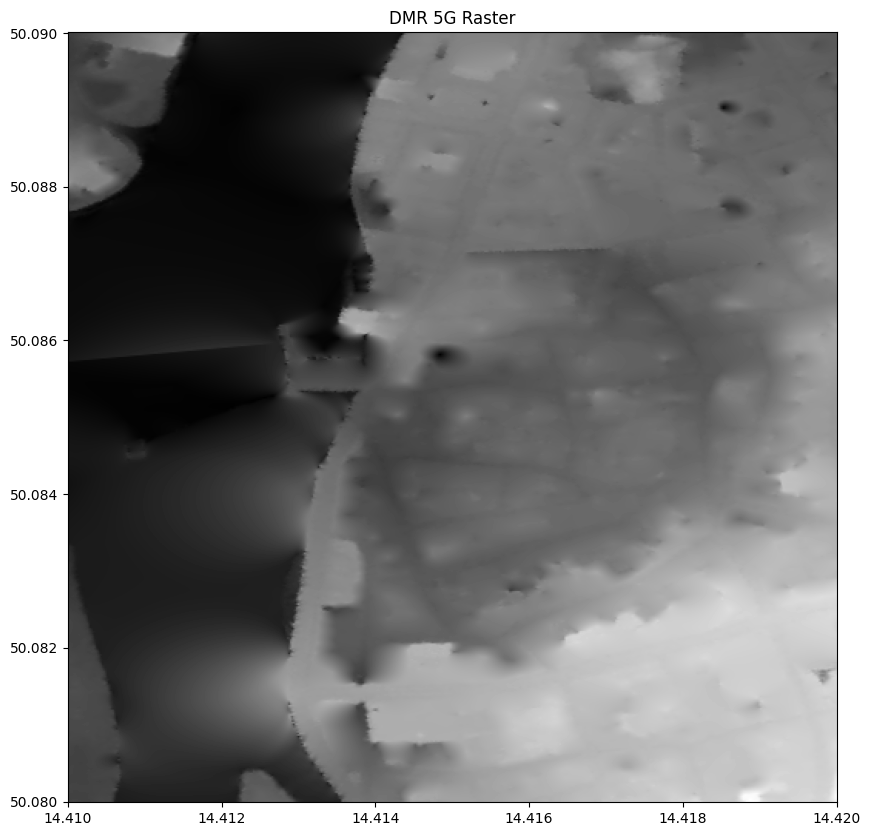

Default Encoding: utf-8
Preferred Encoding: UTF-8


In [1]:
import requests
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

# Definujte malý bounding box (minx, miny, maxx, maxy)
bbox = [14.41, 50.08, 14.42, 50.09]  # Příklad souřadnic pro malou oblast v Praze

# Vypočítejte šířku a výšku z bounding boxu
minx, miny, maxx, maxy = bbox
width = maxx - minx
height = maxy - miny

max_size = 500  # Maximální velikost rozměru (pro šířku nebo výšku)

aspect_ratio = width / height

if width > height:
    image_width = max_size
    image_height = int(image_width / aspect_ratio)
else:
    image_height = max_size
    image_width = int(image_height * aspect_ratio)

url = "https://ags.cuzk.cz/arcgis2/rest/services/dmr5g/ImageServer/exportImage"

params = {
    "bbox": f"{bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]}",  # Souřadnice bounding boxu (minx, miny, maxx, maxy)
    "bboxSR": 4326,  # Prostorový referenční systém pro bounding box (WGS 84)
    "imageSR": 4326,  # Prostorový referenční systém pro obrázek (WGS 84)
    "size": f"{image_width},{image_height}",  # Dynamicky nastavená velikost obrázku (v pixelech)
    "format": "tiff",  # Výstupní formát (TIFF)
    "f": "image"  # Požadavek na obrázek (raster data)
}

response = requests.get(url, params=params)

if response.status_code == 200:
    # Uložte obsah odpovědi (TIFF soubor) do lokálního souboru
    with open("dmr5g_bounding_box.tif", "wb") as f:
        f.write(response.content)

    # Otevřete uložený TIFF soubor pomocí rasterio
    with rasterio.open("dmr5g_bounding_box.tif") as src:

        fig, ax = plt.subplots(figsize=(10, 10))
        
        show(src, ax=ax, cmap='gray')
        
        # Přidejte název
        plt.title("DMR 5G Raster")
        
        # Zobrazte graf
        plt.show()

else:
    print(f"Failed to download raster data. Status code: {response.status_code}")



import sys
import locale

# Získání výchozího kódování
default_encoding = sys.getdefaultencoding()

# Získání preferovaného kódování
preferred_encoding = locale.getpreferredencoding()

print(f"Default Encoding: {default_encoding}")
print(f"Preferred Encoding: {preferred_encoding}")